In [ ]:

# Load the datasets
import pandas as pd
customers = pd.read_csv(customers_path.csv)
products = pd.read_csv(products_path.csv)
transactions = pd.read_csv(transactions_path.csv)

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [40]:
# Merge datasets on 'CustomerID' if CustomerID is a common key
data = pd.merge(transactions, customers, on='CustomerID', how='left')

customer_agg = data.groupby('CustomerID').agg({
    'TotalValue': ['sum', 'mean', 'count']
}).reset_index()

# Flatten the multi-level columns
customer_agg.columns = ['CustomerID', 'TotalSpent', 'AverageSpent', 'TransactionCount']

# Feature selection and scaling
scaler = StandardScaler()
features = customer_agg[['TotalSpent', 'AverageSpent', 'TransactionCount']]
scaled_features = scaler.fit_transform(features)

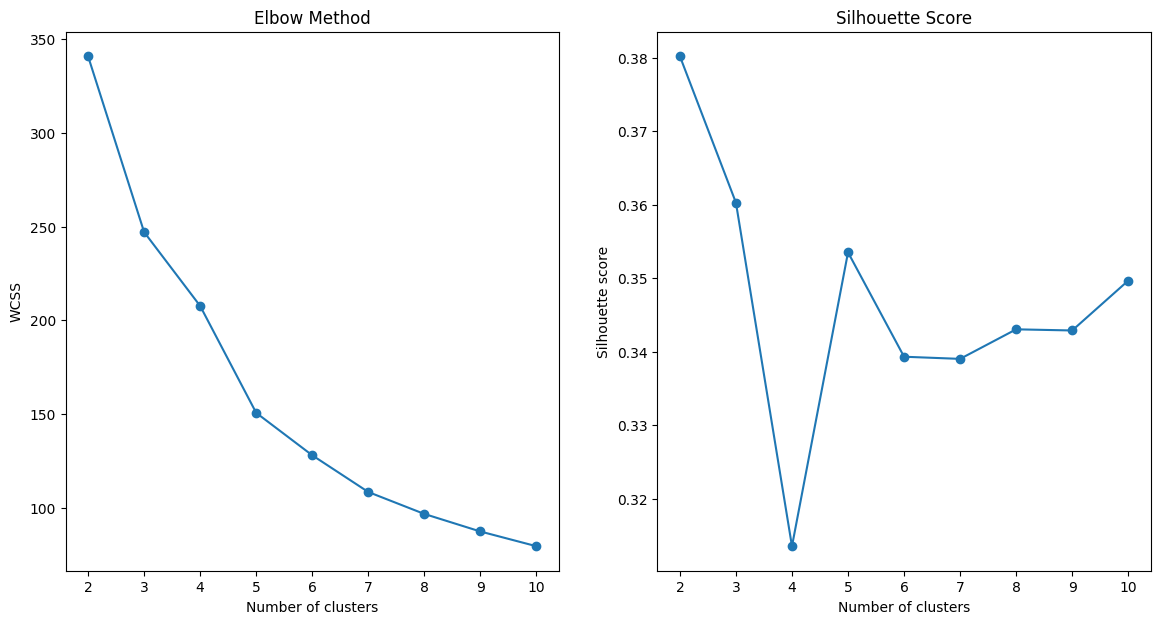

In [41]:
def evaluate_clusters(features, max_k):
    wcss = []
    silhouette_scores = []

    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(features)
        wcss.append(kmeans.inertia_)

        # Compute silhouette score
        sil_score = silhouette_score(features, labels)
        silhouette_scores.append(sil_score)

    plt.figure(figsize=(14, 7))
    plt.subplot(121)
    plt.plot(range(2, max_k+1), wcss, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')

    plt.subplot(122)
    plt.plot(range(2, max_k+1), silhouette_scores, marker='o')
    plt.title('Silhouette Score')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette score')

    plt.show()

evaluate_clusters(scaled_features, 10)


In [32]:
"""# Assume optimal_k is chosen based on the previous step results
optimal_k = 5  # this is an example, choose based on your evaluation
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(scaled_features)

# Compute DB Index
db_index = davies_bouldin_score(scaled_features, labels)
print(f"Davies-Bouldin Index: {db_index}")"""


Davies-Bouldin Index: 0.8524813520458038


In [42]:
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
labels = agg_clustering.fit_predict(scaled_features)


In [43]:
db_index = davies_bouldin_score(scaled_features, labels)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.8851081906022241


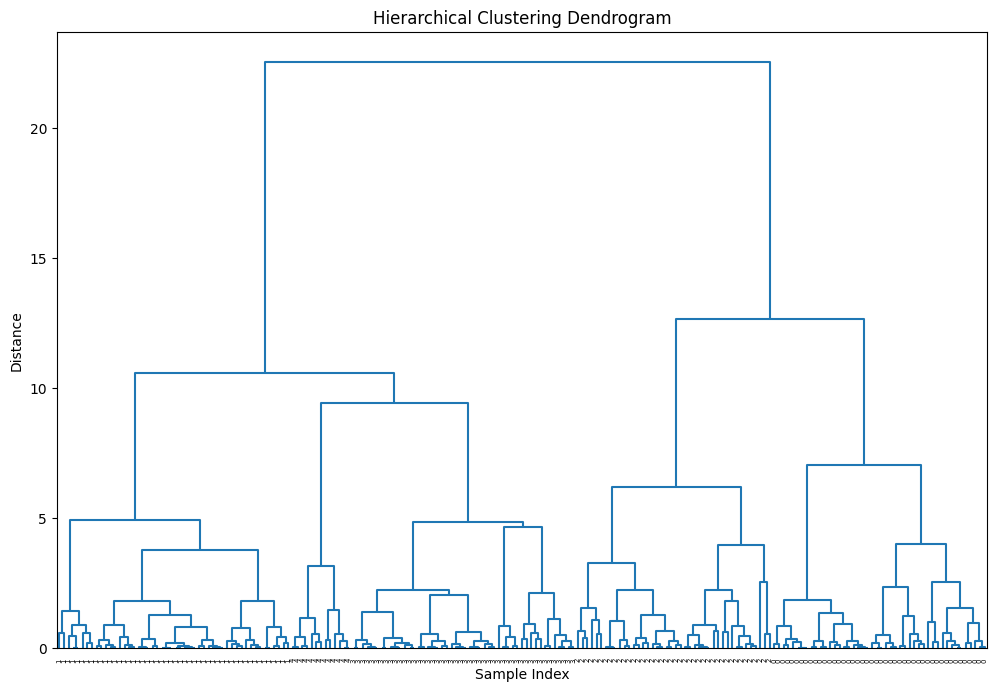

In [36]:
# Generate the linkage matrix
Z = linkage(scaled_features, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=agg_clustering.labels_, color_threshold=0)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


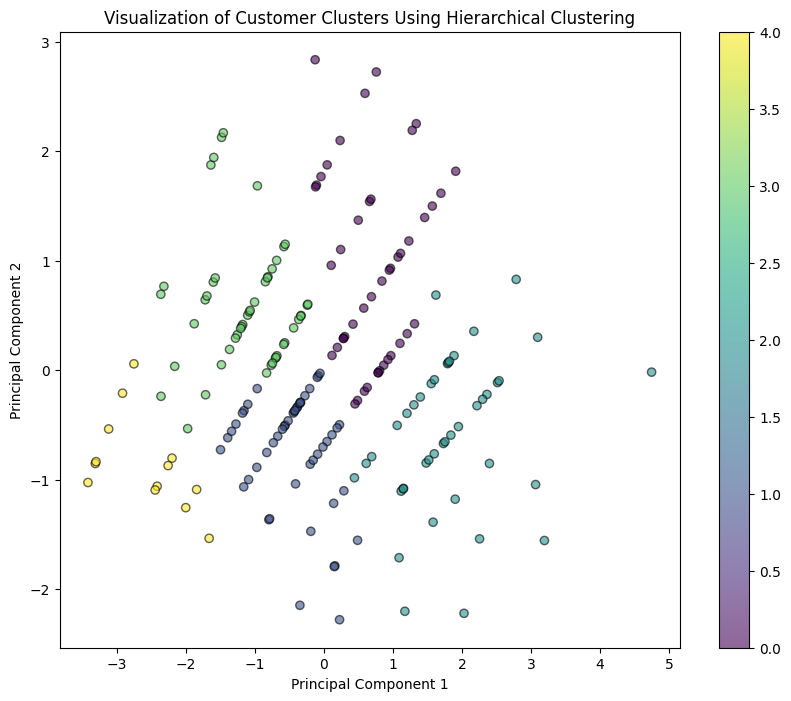

In [37]:
# Using PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
clustered_data = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 8))
plt.scatter(clustered_data[:, 0], clustered_data[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolors='black')
plt.title('Visualization of Customer Clusters Using Hierarchical Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()


after hierarchical


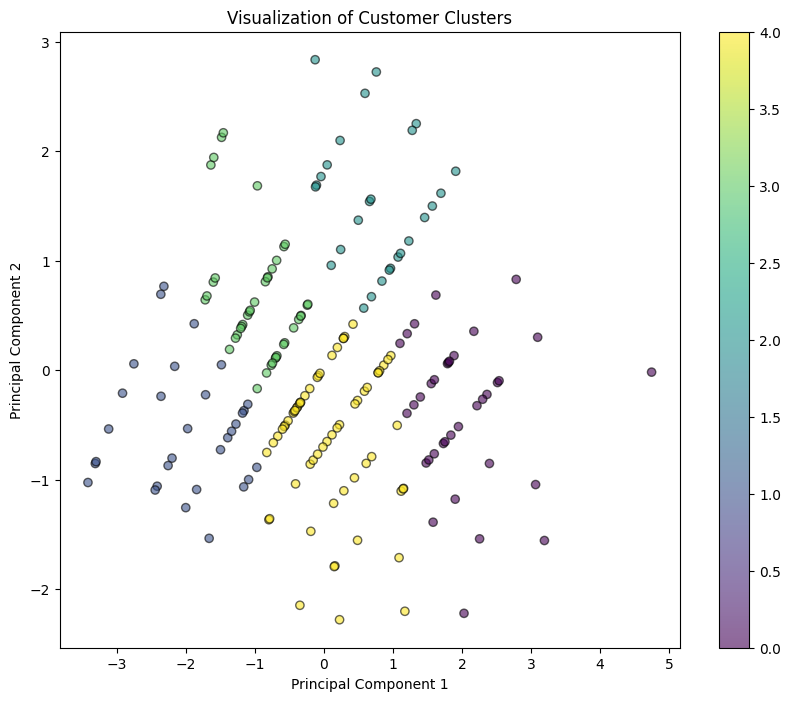

In [25]:
pca = PCA(n_components=2)
clustered_data = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 8))
plt.scatter(clustered_data[:, 0], clustered_data[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolors='black')
plt.title('Visualization of Customer Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()


after k means
